# Lab 3 - Distant Reading with Python

## Hello
**[Kaspar](https://arxiv.org/abs/1511.02301)**

## Demo Cell

In [ ]:
data = open('alice.txt','r').read()
#data
import nltk
data.split()

In [ ]:
#-Distant Reading
# -Preprocessing
#print('Hello, World'.lower())

# --------- #
#

#-Pipeline: Reading and writing data
#lowercased = 'Hello, World!'.lower() # input and lowercase
#print(lowercased) # print the variable
#output = open('hello.txt','w') # create a new document
#output.write(lowercased) # write information to file
#output.close() # close file

# --------- #

#-splitting strings into words
#print('Hello, World!'.split())
#from nltk.tokenize import word_tokenize # import the tokenization tool
#tokens = word_tokenize(data) # tokenize string
#print(tokens) # print tokens

# --------- #

#-Counting words
#from collections import Counter
#wordfreq = Counter(tokens)
#print(wordfreq)
#print(wordfreq['hello'])
#print(Counter(tokens).most_common(100))
# --------- #

#-Transforming a string to an NLTK Text object
#import nltk
#hello_nlkt = nltk.text.Text(tokens)
#print(type(tokens))
#print(type(hello_nlkt))

# -------- #

#-Demo other tools: word clouds, keyword extraction, sentiment

## 1. What is Distant Reading?
- Processing content "without engaging in the reading of the text". [(J. Drucker)](http://dh101.humanities.ucla.edu/?page_id=62). 
- (Data) Mining as the new reading. Data as an entry point to culture and politics.
- Expose patterns that human readers fail to notice (zoom-techniques).
- **"Hackability of texts"** ([Ray Siemens, Algorithmic Criticism](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781405177504.ch26)): Creating new interpretations by radically transforming texts
    - Computational tools assist the critic in the unfolding of interpretive possibilities, e.g word counting, KWIC, collocation analysis;
    - Algorithmic transformation can provide alternative visions on a text. A computer carries out transformations in a rigidly holistic manner;
    - Expanded powers of observation.

## 1.1. Materials 

### 1.1.1 Data

- [Hillary Clinton emails](https://www.kaggle.com/kaggle/hillary-clinton-emails)
- [The Complete Works of William Shakespeare](http://www.gutenberg.org/files/100/100-0.txt)

### 1.1.2 Installing the Python tools

Many of the examples below are taken from the [NLTK book](http://www.nltk.org/book/) Before we start, we should install the required materials. Run the cells below to install the tools and corpora. This can take a minute...

In [ ]:
# import NLTK and install a required data
import nltk
nltk.download('book')

Please also run the cells below to install the additional material.

In [ ]:
# installing a word cloud library
!pip install wordcloud

In [ ]:
#!pip install rake-nltk
!pip install python-rake

## 2 Preprocessing

In what follows we have a closer look at some of the common steps of the **data mining pipeline**. How to go from **"raw"** input to **insights**.

The first step is loading data into Python. To open the original data we use the Pandas library (to which we turn later in this course). For now, just run the code and inspect the output.

The cell below opens a document that contains the Clinton emails. Clinon's private emails were released by the State Department and contain around 7,000 pages of Clinton's heavily redacted emails (its biggest release of emails to date). The code on the third line prints the first five rows of the Clinton email dataset.

In [ ]:
import pandas
hillary = pandas.read_csv('./data/Emails_sorted.csv',header=0)
hillary.head(5)

### --Exercise--

Read carefully the output above. What information does each column contain? Do you understand the structure of the table?

For the purpose of this Lab session, we only look at the `ExtractedBodyText`. We save it in a separate document.

We paste together all information in the `ExtractedBodyText` column using `.join` (you can ignore the syntax for now, just remember that `output_data` now contains all extracted body text.).

In [ ]:
output_data = '\n'.join(hillary[~hillary.ExtractedBodyText.isnull()].ExtractedBodyText)

Then we write the data to a file with the name 'hillary.txt'. The syntax is similar to reading data from disk, but notice that:
1. We change the second argument (of the `open` function)from 'r' to 'w' (from read to write). 
2. Instead of `.read()`  we apply the `.write()` method. The data we want to write is given as an argument to (i.e. put between parenthesis) to the `.write` method.
3. After storing our information, we close the file.

In [ ]:
import codecs
output_document = codecs.open('hillary.txt','w',encoding='utf-8') # create a document where to write the information
output_document.write(output_data) # write output_data to the output_document
output_document.close() # close the output document

### --Exercise--

1. Create a new variable `my_sent` and assign it to string value;
2. Open a document with the name `my_doc.txt`;
3. Write `my_sent` to `my_doc.txt`;
4. Close the file.

In [ ]:
# insert your code here
my_sent = 'Trade war as it threatens to unsettle global economy.'
output = open('my_doc.txt','w')
output.write(my_sent)
output.close()

### --Exercise--

Open the file 'shakespeare.txt', which is stored in the 'data' folder (i.e. use './data/shakespeare.txt' as path). 

Assign the complete works to a variable with the name `shakespeare_complete`.

In [ ]:
# insert your code here
shakespeare_complete = open('./data/shakespeare.txt').read()

### 2.1 Lowercasing

Performing analytics to text objecs, often boils down to counting--counting words, to be precise. But what constitutes a word? Which distinctions do we want to retain? 

### --Exercise--

Consider the following text fragment and compare the output of the `Counter` function. 
- How to interpret the output of `Counter()`?
- What is the effect of the `.split()` method?
- How does lowercasing change the results?

In [ ]:
from collections import Counter # we need to import Counter explicitly, it is not part of Python's standard library
text = 'Hello hello I exchanged an Apple for an apple' # assign the example text to text

In [ ]:
Counter(text)

In [ ]:
Counter(text.lower())

In [ ]:
Counter(text.lower().split())

In [ ]:
Counter(text.split())

As you see, without lowercasing we keep the distinction between the company and the fruit, but also count Hello and hello as two different words, even though treating them as the same would make more sense. 

There is no 'right' or 'wrong' in this case; it ultimately depends on your research question, but be aware the subtle choices have an effect on your results.

### 2.2 Word Tokenization

As alluded to earlier, 'tokens' are the minimal units for the machine to process. We often simply equate **tokens with words**, which, in turn, were defined as everything between two whitespaces--but the relationship is more complex. 

### --Exercise--

The simplest way to count tokens is to treat everything between white spaces as one token. To test this approach, first lowercase and then `.split()` the sentence below. After these steps, count the tokens (using the `Counter` function from above). 

In [ ]:
from collections import Counter
sentence =  "On the 12th of August, 18-- (just three days after my tenth birthday, when I had been given such wonderful presents), I was awakened at seveno’clock in the morning by Karl Ivanitch slapping the wall close to my head with a fly-flap made of sugar paper and a stick."
# insert your code here
sent_lowercased = sentence.lower()
words = sent_lowercased.split()
Counter(words)

Clearly, such a rudimentary method does not suffice. Luckily, NLTK comes with many ready-made tools for splitting strings neatly into tokens. Again we have to import some external tools, in this case the `word_tokenize` function. We apply it to the first sentence of Tolstoy's "Childhood".

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
sentence = "On the 12th of August, 18-- (just three days after my tenth birthday, when I had been given such wonderful presents), I was awakened at seveno’clock in the morning by Karl Ivanitch slapping the wall close to my head with a fly-flap made of sugar paper and a stick."

In [ ]:
print(word_tokenize(sentence))

There is not one "correct" method for tokenizing texts. Therefore, NLTK comes with many different tokenizers. What are their differences?

In [ ]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize

In [ ]:
print(sentence.split())

In [ ]:
print(regexp_tokenize(sentence, pattern='\w+'))

In [ ]:
print(wordpunct_tokenize(sentence))

### --Exercise--

- How many characters does the complete works of Shakespeare contain?
- How many tokens?
- Does the type of tokenization change the tokens count? 

**HINT** Compare `.split()` to `word_tokenize()`. Use `len` to count the number of tokens.


In [ ]:
# insert your code here
print('Num chars = ',len(shakespeare_complete))
print('Num tokens Split = ',len(shakespeare_complete.split()))
print('Num tokens NLTK = ',len(word_tokenize(shakespeare_complete)))
print('Num tokens NLTK Regexp = ',len(regexp_tokenize(shakespeare_complete, pattern='\w+')))

### 2.3 Sentence Tokenization

Often it is useful to process a text by sentence, when we want, for example, inquire the use of different words within their meaningful context. 

In [ ]:
from nltk.tokenize import sent_tokenize
book = 'This is a sentence. And this another one!'
sent_tokenize(book)

### --Exercise-- 
How many sentences does Alice in Wonderland contain (approximately)?

In [ ]:
# open alice.txt
alice = open('alice.txt','r').read()
# split the text by sentence, assign the splitted copy to alice_sent_split
alice_sent_split = sent_tokenize(alice)
# apply len to alice_sent_split
len(alice)

### Tokens vs Types

A **token** is a technical name for a **sequence of characters** — such as hairy, his, or :) — that we want to **treat as a group** (or **unit** of our analysis). When we count the number of tokens in a text, say, the phrase "to be or not to be", we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of "to", two of "be", and one each of "or" and "not". 

In [ ]:
sentence = 'to be or not to be'
tokens = sentence.split()
print(tokens,len(tokens))

But there are only **four distinct** vocabulary items in this phrase. In Python we can use the `set()` function to count the number of **unique** words also called *types*

In [ ]:
types = set(tokens)
print(types,len(types))

To measure complexity of a text, we can compute the [type-token ratio](https://www.sltinfo.com/type-token-ratio/):

In [ ]:
round((len(types)/len(tokens)*100),1)

### --Exercise--

We can apply this to larger texts!

- How many tokens do the complete works of William Shakespeare contain?
- How many **distinct words** (types) does the book of Genesis contain? (In other words, how large is, approximately, his vocabulary?
- Can you print the type-token ratio?

In [ ]:
# insert your code here
shakespeare_tokens = regexp_tokenize(shakespeare_complete,pattern='\w+')
print('Vocab size = ',len(set(shakespeare_tokens)))
print('Type-token ratio = ',len(set(shakespeare_tokens))/len(shakespeare_tokens))

## 2.4 Counting Word Frequencies

By tokenizing a text, we convert the string to a **list** in which each element is approximately one word. The code below gives an overview of the individual steps:

In [ ]:
from nltk.tokenize import word_tokenize # import stuff
from collections import Counter # import stuff
shakespeare = open('./data/shakespeare.txt','r').read() # open and read the document
shakespeare_lower = shakespeare.lower() # lowercase the text, store it in shakespeare_lower
shakespeare_tokens = word_tokenize(shakespeare_lower) # tokenize the text, store it in shakespeare_tokens
tokenfrequency = Counter(shakespeare_tokens) # creates a word-to-frequency mapping

The variable `tokenfrequency` now holds a `Counter()`  object which **maps words to their frequencies**.

In [ ]:
tokenfrequency

Later in this course--when we have a closer look at Python dictionaries--we inspect such mappings more thoroughly. For now, just note that the `Counter()` object allows you to access the frequency of an individual word. Please note we use **square brackets** here, not the parenthesis as usually.

In [ ]:
tokenfrequency['you']

## --Exercise--

- What is the frequency of 'hamlet'?
- What is the frequency of 'spamlet'? 

In [ ]:
# insert your code here
print(tokenfrequency['hamlet'])
print(tokenfrequency['spamlet'])

We can also sort the mapping by frequency and plot the *n* most common tokens.

In [ ]:
tokenfrequency.most_common(25)

Notice that you can perform all these steps in just one line, but the code becomes more difficult to read.

In [ ]:
Counter(word_tokenize(open('./data/shakespeare.txt','r').read().lower())).most_common(25)

### --Exercise--

- Compare the most frequent words in Shakespeare to Alice in Wonderland. What are the differences and similarities?

In [ ]:
# insert your code here
Counter(word_tokenize(open('./alice.txt','r').read().lower())).most_common(25)

## 3. Exploring data with Natural Language ToolKit (NLTK) 

## 3.1 From lists to NLTK Text objects

So, far we covered just the most basic operation: counting words. Even though word frequencies can give us some insight into the content of a file, it remains a crude analytical instrument. 

NLTK comes with more refined tools to analyse corpora from a distance and extract lexical patterns.

In the Digital Humanities, we often treat texts as *raw data*, as input for our programs. Interpretations arise from abstraction, transformation and decontextualization, for example, by counting word frequencies, analysing specific segments of a corpus (i.e. Key Word In Context, or KWIC analysis) or searching for patterns (i.e. collocations). 

NLTK provides several tools for both **processing** data and **interpreting** texts.

Let's see what corpora NLTK provides, but first, we have to import everything!

In [ ]:
import nltk

NLTK comes with some preprocessed texts:

In [ ]:
from nltk.book import *

`from nltk.book import *` says as much as "from NLTK's book module, load all items." This loads all the books that are preprocessed for further analysis.

Below we use these books occasionally--for demonstration purposes. We focus on the data we processed ourselves.

From the above output, we discover that NLTK includes the script of 'Monty Python and the Holy Grail'. When we `print` text6 we (surprisingly) can not see the actual content yet.

In [ ]:
print(text6)

As a standard procedure, we should uncover the data type of the object we are dealing with.

In [ ]:
print(type(text6))

... and inspect which functionalities are attached to this object:

In [ ]:
dir(text6)

We can do a lot with this `Text` object. To view all the methods attached to this object, use Python's help function. You can ignore all the methods that start with a double underscore and scroll down.

In [ ]:
help(nltk.text.Text)

The list above shows the tools that NLTK provides you for analysing your text data. 

In [ ]:
text6.concordance('shrubbery')

To convert a text object to an NLTK text object, we need to tokenize the text first.

In [ ]:
hillary_text = open('hillary.txt','r').read() # open the text
hillary_text_lower = hillary_text.lower() # lowercase the text
hillary_tokens = word_tokenize(hillary_text_lower) # tokenize the text

In [ ]:
hillary_tokens[:100] # print the first hundred tokens

The line below does not return any output, but here is where the magic happens, i.e. where we **transform a simple list of tokens to an NLTK Text object** (why this is useful will be explained below). 

In [ ]:
hillary_nltk = nltk.text.Text(hillary_tokens)

Below we inspect some of the methods attached to the `Text` object.

### --Exercise--

- Convert the complete works of Shakespeare to an NLTK text object.

In [ ]:
# insert your code here
from nltk.tokenize import wordpunct_tokenize
shakespeare = open('./data/shakespeare.txt','r').read()
shakespeare_tokens = wordpunct_tokenize(shakespeare)
shakespeare_nltk = nltk.text.Text(shakespeare_tokens)
shakespeare_nltk.concordance('spring') # just to test

## 3.2 NLTK Tools

###  3.2.1. `.concordance()`

An oft-used technique for distant reading is **Keyword In Context Analysis** in which we centre a whole corpus on a specific word of interest. NLTK comes with a `concordance()` method that allows you to do just this. 

In [ ]:
help(nltk.text.Text.concordance)

With concordance, we can easily look up what was said about Trump in Hillary's emails.

In [ ]:
hillary_nltk.concordance('trump')

Or, given that Clinten was Secretary of State, what is said about Iran?

### -- Exercise--
- Center corpus on "iran" and "obama"

In [ ]:
# add your code here
hillary_nltk.concordance('iran')

In [ ]:
hillary_nltk.concordance('obama')

As you noticed, there are more hits for "Iran" than shown in the list above. We can specify the number of hits to print with the `lines` argument.

In [ ]:
hillary_nltk.concordance('obama',lines=100)

The context--the words surrounding the queried term--is often too short to understand what is actually going on. We can expand the number of characters by tweaking the `width` argument.

### Exercise

In the Clinton emails:
- search for `bush`;
- print the first 50 results;
- expand the context to 150 characters;

In [ ]:
# insert your code here
hillary_nltk.concordance('bush',lines=10,width=150)

### --Exercise--

Inspect the use of the word "monstrous" in Melville's Moby Dick:

In [ ]:
text1.concordance('monstrous')

### 3.2.2. `.similar()`

`concordance()` shows words in their context. For example, we saw that monstrous occurred in contexts such as the \_\_\_ pictures and a \_\_\_ size. What other words appear in a **similar context**? We can find out by applying the `.similar` method to an NLTK text and enter the word you want analyse within parentheses (don't forget to put a string between quotation marks):

In [ ]:
help(text1.similar)

`.similarity()` returns a list of semantically related words from one text (based on the intuition that words which share common contexts are related) 

In [ ]:
#text1: Moby Dick by Herman Melville 1851
text1.similar("monstrous")
print('\n')
#text2: Sense and Sensibility by Jane Austen 1811
text2.similar("monstrous")

Observe that we get **different results for different texts**. Austen uses this word quite differently compared to Melville; for her, monstrous has positive connotations and sometimes functions as an intensifier like the word very.

`.similar()` helps us to understand how words are used, by proposing similar items. Let's have a look at Shakespeare.

Below we convert a string object to NLTK Text object. The syntax should look familiar, no?

In [ ]:
shakespeare = open('./data/shakespeare.txt','r').read()
shakespeare = shakespeare.lower()
shakespeare_tokens = word_tokenize(shakespeare)
shakespeare_nltk = nltk.text.Text(shakespeare_tokens)

### --Exercises--

Using Shakespeare's complete works, which words are similar to:
- jew
- summer
- terrible

In [ ]:
# insert your code here
shakespeare_nltk.similar('jew')
shakespeare_nltk.similar('summer')
shakespeare_nltk.similar('terrible')

### 3.2.3. `.common_contexts()`

In [ ]:
help(nltk.text.Text.common_contexts)

The method `common_contexts` allows us to **examine just the contexts** that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma.

To understand why 'terrible' and 'noble' are similar--which contexts they share--run the cell below:

In [ ]:
shakespeare_nltk.common_contexts(["terrible", "noble"])

### --Exercise--

- Find the contexts shared by 'lovely' and 'sweet'

In [ ]:
# insert your code here
shakespeare_nltk.common_contexts(["lovely", "sweet"])

### 3.2.4. `.dispersion_plot()`

We can also determine the **location** of a word in the text: how many words from the beginning it appears. This **positional information** can be displayed using a dispersion plot. Each **stripe** represents an instance of a word, and each **row** represents the entire text. Below we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

In [ ]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### --Exercise--

- Find the thematic shifts in the Clinton emails using the dispersion plot, see example below.
- Apply the same technique to the Shakespeare corpus.

In [ ]:
%matplotlib inline
hillary_nltk.dispersion_plot(['iran','israel','palestine','netherlands','belgium'])

In [ ]:
# insert your code here

In [ ]:
# insert your code here

### 3.2.5. `.collocations()`

A collocation is a **sequence of words that occur together unusually often**. Thus *red wine* is a collocation, whereas *the wine* is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

### -- Exercise--

- Inspect the collocation documentation using Python in-built `help` function.
- Apply `.collocations` to some of the Shakespeare's collected works. Assess the outcomes and its use for research.
- change the `window_size` argument, and see how it affects the output.

In [ ]:
# insert your code here
help(hillary_nltk.collocations)

In [ ]:
hillary_nltk.collocations()

In [ ]:
hillary_nltk.collocations(window_size=20)  # this may take a while

# 4. Additional Tools

## 4.1. Word Clouds

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(text):
    """
    Simple function that takes a string as argument and 
    plot the standard word cloud.
    """
    # Generate a word cloud image
    wordcloud = WordCloud(width=600,height=400,scale=2,max_words=100,mode='RGBA').generate(text)

    # Display the generated image:
    # the matplotlib way:
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


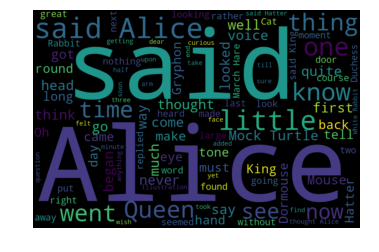

In [3]:
# First run the preceding code cell, otherwise plotting the word cloud won't work
text = open('data/alice.txt').read()
plot_cloud(text)

## 4.2. Keyword Extraction with [RAKE](https://pdfs.semanticscholar.org/5a58/00deb6461b3d022c8465e5286908de9f8d4e.pdf)

In [ ]:
import RAKE
hillary_text = open('./data/alice.txt').read()
# https://github.com/fabianvf/python-rake
rake = RAKE.Rake(RAKE.SmartStopList())
rake.run(hillary_text, minCharacters = 3, maxWords = 3, minFrequency = 4)

## Epilogue: Emotion Mining

## Vader Sentiment Analyzer
The variable paragraphs counts is not the most interesting one, let's have a look at the semtiment values of these mentions of immigration.

For this we use **VADER**.

[from Github](https://github.com/cjhutto/vaderSentiment): VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool.

VADER uses a lexicon (a mapping of words to sentiment values, e.g bad=-1.0, good=+1.0) to compute the sentiment (positivity or negativity) of a text.

In [ ]:
# we need to install the vader lexicon first
import nltk
nltk.download('vader_lexicon')

Now load the VADER Sentiment analyzer

In [ ]:
from nltk.sentiment import vader
analyzer = vader.SentimentIntensityAnalyzer()

Below you can test VADER yourself by changing the value of the ``text`` variable, and running the code block. 

Can you trick the system? Not very easy isn't it?!

In [ ]:
text = """That was not quite as awful for Theresa May as the “nothing has changed” general election presser where she had to rewrite her election manifesto after the “dementia tax” self-destructed, but it was not far off. She looked tetchy, defensive and weakened. Number 10 weren’t expecting a breakthrough at Salzburg, but they were hoping that the EU27 would be sufficiently diplomatic, or evasive, to keep the Chequers option in play. The comments we’ve had in the last hour (eg, see 2.20pm, 2.23pm and 2.49pm) indicate that her hopes have been dashed, and that all that’s left for Chequers (at least, its core principles) is for someone to perform the last rites."""
sentiments_analysis = analyzer.polarity_scores(text)
print(sentiments_analysis)

We are interested here in the compound, the combination of positive and negative sentiments. We can select this by putting the string 'compound' between square brackets

In [ ]:
sentiments_analysis['compound']